In [23]:
import pandas as pd                  # to create a DataFrame tableau 
import pandas_datareader.data as web # package that allows us to create a pandas DataFrame object by using various data sources from the internet.
import numpy as np                   # calcul scientifique 
import datetime as dt                # traiter les dates 
import matplotlib.pyplot as plt      # ajouter des éléments tels que des lignes, des images ou des textes aux axes d'un graphique
from matplotlib import style         # tracer et visualiser des données sous formes de graphiques.
style.use ('ggplot')                 # tracer des fonctions 
import os

pd.options.mode.chained_assignment = None  # default='warn' # pour éviter les warnings

from matplotlib import pyplot
%matplotlib inline

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import yfinance as yf
from pandas import Series
import seaborn as sns

from pylab import rcParams  # to  customize Matplotlib
from statsmodels.tsa.stattools import adfuller  # pour le test de dickey Fuller 
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

## Read The Data

In [45]:
path = "C:/Users/dell/Desktop/MASTER 2021 2023/M2IFM/S2M2/MEMOIRE/DATA/"
path

'C:/Users/dell/Desktop/MASTER 2021 2023/M2IFM/S2M2/MEMOIRE/DATA/'

In [55]:
def parser(S):
    return dt.strptime(S, '%Y-%m')

In [56]:
### 1 - Données FOREX 
forex = pd.read_excel(path+"stg2.xlsx",sheet_name="Datayet",date_parser=parser)
forex.head(5)

,DATE,ASK,BID,VOLUME,SPREAD,LnVOLUME
0,2001-01-01,0.939697,0.940119,15158.258065,0.000423,9.626301
1,2001-02-01,0.921614,0.922032,15665.750000,0.000418,9.659232
2,2001-03-01,0.909348,0.909732,9611.129032,0.000384,9.170677
3,2001-04-01,0.892967,0.893367,6687.166667,0.000400,8.807946
4,2001-05-01,0.875506,0.875942,6962.258065,0.000435,8.848259


In [57]:
### 2- Données ONI 
oni = pd.read_excel(path+"data_oni_forex.xlsx",sheet_name="Tempyet")
oni = oni.iloc[:,[6,5,7,1,3,0]]
oni.head(5)

,DATE,Year,SEASON,ONI,Phase,dSST3.4
0,2001-01-01,2001,djf,-0.680000,Cool Phase/La Nina,-0.63
1,2001-02-01,2001,jfm,-0.516667,Cool Phase/La Nina,-0.53
2,2001-03-01,2001,fma,-0.436667,Neutral Phase,-0.39
3,2001-04-01,2001,mam,-0.340000,Neutral Phase,-0.39
4,2001-05-01,2001,amj,-0.246667,Neutral Phase,-0.24


In [60]:
### Fusion bases forex & ONI 
forexoni=pd.merge(forex,oni,on="DATE") 
forexoni.head(5) 

,DATE,ASK,BID,VOLUME,SPREAD,LnVOLUME,Year,SEASON,ONI,Phase,dSST3.4
0,2001-01-01,0.939697,0.940119,15158.258065,0.000423,9.626301,2001,djf,-0.680000,Cool Phase/La Nina,-0.63
1,2001-02-01,0.921614,0.922032,15665.750000,0.000418,9.659232,2001,jfm,-0.516667,Cool Phase/La Nina,-0.53
2,2001-03-01,0.909348,0.909732,9611.129032,0.000384,9.170677,2001,fma,-0.436667,Neutral Phase,-0.39
3,2001-04-01,0.892967,0.893367,6687.166667,0.000400,8.807946,2001,mam,-0.340000,Neutral Phase,-0.39
4,2001-05-01,0.875506,0.875942,6962.258065,0.000435,8.848259,2001,amj,-0.246667,Neutral Phase,-0.24


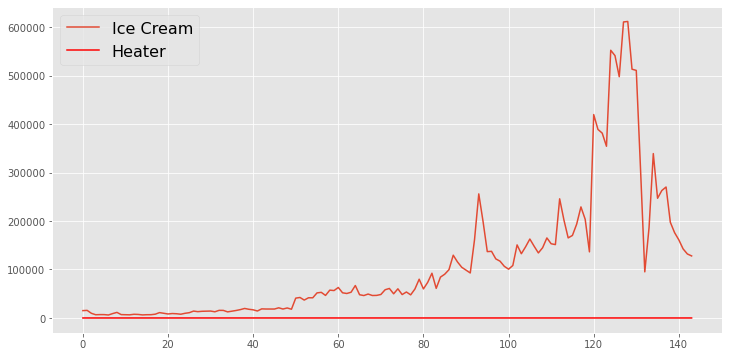

In [59]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(forexoni['VOLUME'])
heater, = plt.plot(forexoni['ONI'], color='red')



plt.legend(['Ice Cream', 'Heater'], fontsize=16)

## Normalize

In [34]:
avgs = forexoni.mean()
devs = forexoni.std()

C:\Users\dell\AppData\Local\Temp/ipykernel_40068/1615463205.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avgs = forexoni.mean()
C:\Users\dell\AppData\Local\Temp/ipykernel_40068/1615463205.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avgs = forexoni.mean()
C:\Users\dell\AppData\Local\Temp/ipykernel_40068/1615463205.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  devs = forexoni.std()


TypeError: 'module' object is not callable

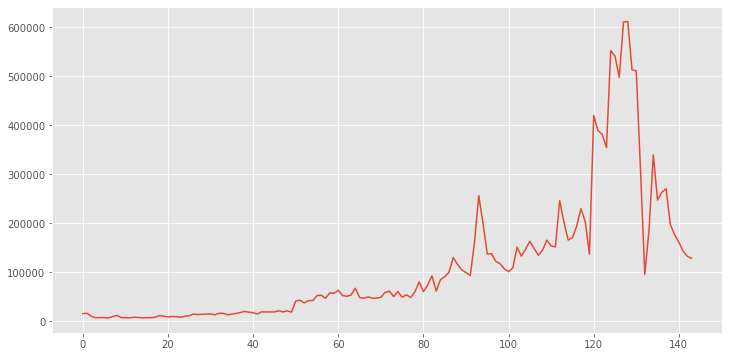

In [40]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(forexoni['VOLUME'])

for year in range(2004, 2021):
    plt.axvline(dt(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)
plt.legend(['Ice Cream'], fontsize=16)

In [ ]:
# Creating the dataset - using copy
#copy['Date'] = pd.to_datetime(copy.dt)
#copy['Year'] = copy['Date'].dt.year
land_avg = forexoni.groupby('Year')['LnVOLUME', 'ONI'].mean().reset_index()

# Creating the graph
fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1750-2023", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = land_avg['Year'], y = land_avg['LnVOLUME'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = land_avg['Year'], y = land_avg['ONI'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))